# K vecinos cercanos (K Nearest Neighbors)

¡Le han dado un conjunto de datos clasificados de una empresa! Han ocultado los nombres de las columnas de las características, pero le han proporcionado los datos y las clases a predecir.

Intentaremos usar KNN para crear un modelo que prediga directamente una clase para un nuevo punto de datos basado en las características.

## Importemos la librerías



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Carguemos los datos

Establece index_col = 0 para usar la primera columna como índice.

In [2]:
df = pd.read_csv("Classified Data.csv",index_col=0)

In [3]:
#Revisemos los datos
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Estandarizar las variables

Debido a que el clasificador KNN predice la clase de una observación de prueba dada, al identificar las observaciones más cercanas a ella, la escala de las variables es importante. Cualquier variable que esté a gran escala tendrá un efecto mucho mayor en la distancia entre las observaciones y, por lo tanto, en el clasificador KNN, que las variables que están en pequeña escala.

In [4]:
#Importemos la librería
from sklearn.preprocessing import StandardScaler

In [5]:
#Generemos el modelo
scaler = StandardScaler()

In [6]:
#Eliminemos la clase a predecir
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
#Escalemos las características
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [8]:
#Revisemos el resultado
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Dividir los datos en entrenamiento y pruebas.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30,random_state=2020)

## Usando KNN
Recuerda que estamos tratando de generar un modelo que prediga, si cualquira elemento esta en la clase objetivo o no. Comenzaremos con k = 1.

In [11]:
#Importemos la librería
from sklearn.neighbors import KNeighborsClassifier

In [12]:
#Generemos el modelo
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
#Entrenemos el modelo
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [14]:
#Realicemos la predicción
pred = knn.predict(X_test)

## Predicción y Evaluación del modelo

¡Evaluemos el modelo!

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
#Veamos la matriz de confusión
print(confusion_matrix(y_test,pred))

[[138  19]
 [ 12 131]]


In [17]:
#Veamos las métricas de evaluación
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       157
           1       0.87      0.92      0.89       143

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



## Encontrando el K adecuado

Sigamos y usemos el método del codo para elegir un buen valor K:

In [18]:
error_rate = []

# esto tomara un tiempo
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

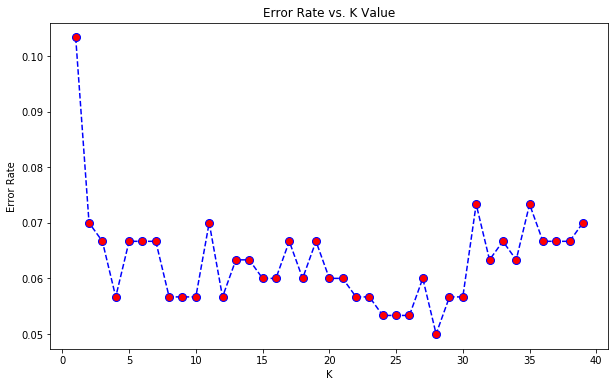

In [19]:
#Veamos los resultados
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Aquí podemos ver que después de alrededor de K> 23, la tasa de error tiende a oscilar entre 0.06-0.05. ¡Volvamos a entrenar el modelo con ese parámetro y verifiquemos el informe de clasificación!

In [20]:
# Comparemos con K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[138  19]
 [ 12 131]]


              precision    recall  f1-score   support

           0       0.92      0.88      0.90       157
           1       0.87      0.92      0.89       143

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [21]:
# Ahora con K=23
knn = KNeighborsClassifier(n_neighbors=22)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[143  14]
 [  3 140]]


              precision    recall  f1-score   support

           0       0.98      0.91      0.94       157
           1       0.91      0.98      0.94       143

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.95      0.94      0.94       300



# ¡Buen trabajo!